# Relatorio EP1

## Introdução

   Neste relatório examinamos duas formas de movimento: o Movimento Retilíneo Uniforme (MRU) e o Movimento Retilíneo Uniformemente Variado (MRUV).Tentaremos estimar, a partir do nosso conhecimento prévio sobre as caracteristicas desses dois movimentos, equações que modelem os dados experimentais adequadamente.
   
   Os experimentos realizados foram os seguintes: Para o MRU, uma pessoa andava em velocidade constante em um terreno plano, e foi medido o tempo de deslocamento dessa pessoa ao atingir as distancias de 10,20 e 30 metros. Para o MRUV, uma pessoa utilizava um skate e eram medidos os tempos nas mesmas distancias.
   
   Enquanto uma pessa fazia o percurso de 30 metros, o restante do grupo se posicionou nas posições de 10, 20 e 30 metros e cronometrava o tempo que a pessoa fazendo o percurso demorava para atingir a posição em questão. Ao fim do percurso, um integrante anotava o tempo de todos os outros integrantes num caderno (dados estes que posteriormente foram transferidos para uma planilha)

## Método

Para os dois experimentos medimos com uma trena as distâncias de 10, 20 e 30 metros de um ponto inicial, e posicionamos pessoas ao longo desses pontos. Cada pessoa tinha um cronometro e registrava quando a pessoa carregando o acelerometro passava pela sua marca. Em algumas ocasiões a pessoa na marca dos 30 metros também gravou o experimento. 
 Antes de cada medição, as pessoas se posicionavam em suas marcas e a pessoa na marca de 10m sinalizava a todos os membros que o experimento estaria prestes a começar (fazendo uma contagem regressiva e, ao fim da contagem, dizendo "Começou"). Depois disso, a pessoa com o acelerometro começava a medição dos dados sem iniciar o movimento e esperava 3 segundos, apos isso ela indicava o inicio do experimento (gritando "Já") e os outros membros iniciavam os cronometros, medindo o tempo que a pessoa demorava para atingir suas marcas.
No MRU, o deslocamento era feito por uma pessoa andando a velocidade constante segurando o celular.
No MRUV, o deslocamento era feito por uma pessoa em cima de um skate ao longo de uma decida, segurando o celular.
Nos dois tipos de movimento fizemos mediçoes com 3 pessoas diferentes, cada pessoa realizando 3 mediçoes. Tentamos padronizar ao máximo os movimentos pedindo para que todos os integrantes segurassem o celular de forma paralela ao chão.



## Verificação

Todas as funções assumem que

1. os vetores recebidos tem mesmo tamanho
2. não há observação no momento inicial
3. a diferença entre duas observações é não nula



## Dados

Realizamos 3 travessias para cada tipo de movimento utilizando três integrantes do grupo, de forma que realizamos, to total, 18 medições : 9 medições para o **MUV** (Movimento Uniformemente Variado) e 9 medições para o **MRU** (M ovimento Retilíneo Uniforme). Com os dados colhidos manualmente, utilizando cronômetros, fomos capazes de plotar os gráficos 

Além disso, utilizando os dados do acelerômetro, plotamos os graficos : 

### Medições do acelerômetro

Os gráficos relativos às medições feitas pelo acelerômetro se referem à força g (resultante entre a força normal e a força peso) dividida em tres componentes : x, y e z; O celular foi segurado com a tela virada para cima, de forma que a componente Gz é perpendicular ao solo, e positiva na direção "do céu", a componente y tem a direção do movimento, e o sentido da velocidade executada pelo corpo, e a componente x está contida no mesmo plano que a componente y, mas é perpendicular a y, de forma que Gy mede as perturbações "laterais" do movimento. Plotamos os seguintes gráficos utilizando os dados brutos do acelerômetro


In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob
names = []
for file in glob.glob("*.csv"):
    if file != "dadosMU.csv" and file != "dadosMUV.csv":
        names.append(file)
#print(names)
names.sort()
def calcula(i):
    tbl = pd.read_csv(names[i])
    tbl.head()
    fig = plt.figure(figsize=(14, 3.5))
    plt.subplot(131)
    plt.xlabel('Time')
    plt.ylabel("FN/Fg")
    plt.plot(tbl['time'],tbl['gFx'],label="gFx")
    plt.plot(tbl['time'],tbl['gFy'],label="gFy")
    plt.plot(tbl['time'],tbl['gFz'],label="gFz")
    #sns.regplot(tbl['time'],tbl['gFz'])
    plt.title(names[i])
    plt.grid(True)
    plt.legend()
    if i+1 in range(len(names)): i+=1
    else:
        plt.tight_layout()
        plt.show()
        return()
    
    tbl = pd.read_csv(names[i])
    tbl.head()
    plt.subplot(132)
    plt.xlabel('Time')
    plt.ylabel("FN/Fg")
    plt.plot(tbl['time'],tbl['gFx'],label="gFx")
    plt.plot(tbl['time'],tbl['gFy'],label="gFy")
    plt.plot(tbl['time'],tbl['gFz'],label="gFz")
    #sns.regplot(tbl['time'],tbl['gFz'])
    plt.title(names[i])
    plt.grid(True)
    plt.legend()
    if i+1 in range(len(names)): i+=1
    else:
        plt.tight_layout()
        plt.show()
        return()
    
    tbl = pd.read_csv(names[i])
    tbl.head()
    plt.subplot(133)
    plt.xlabel('Time')
    plt.ylabel("FN/Fg")
    plt.plot(tbl['time'],tbl['gFx'],label="gFx")
    plt.plot(tbl['time'],tbl['gFy'],label="gFy")
    plt.plot(tbl['time'],tbl['gFz'],label="gFz")
    #sns.regplot(tbl['time'],tbl['gFz'])
    plt.title(names[i])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    if i+1 in range(len(names)):
        i+=1
        calcula(i)
    

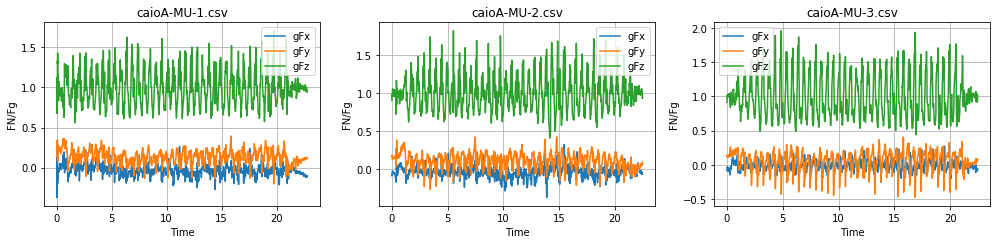

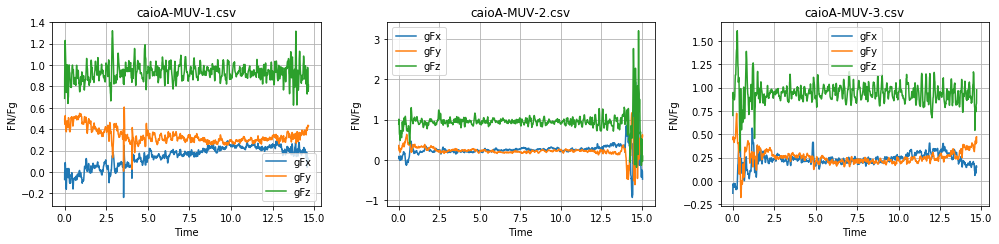

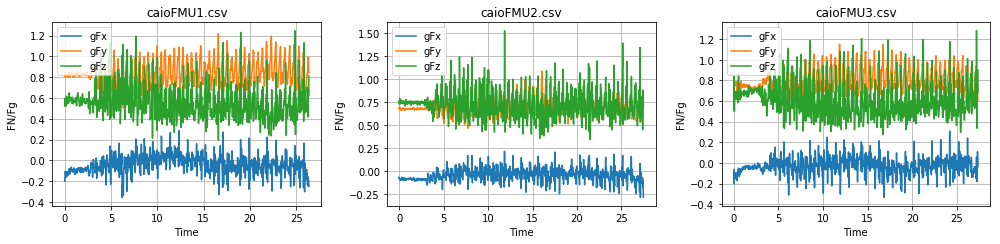

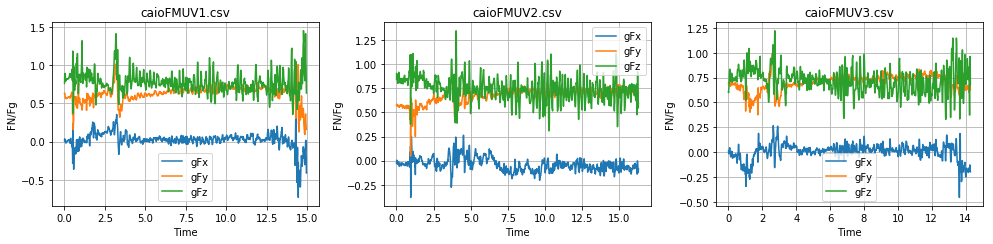

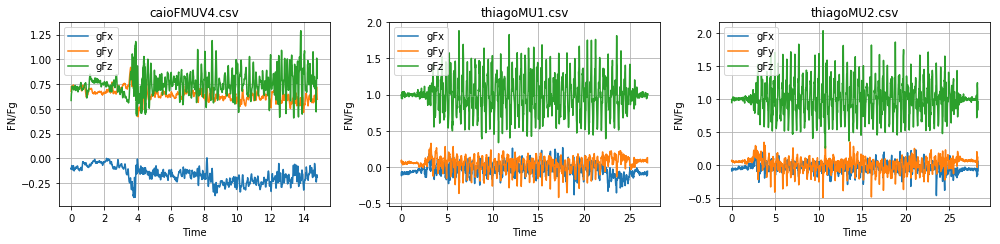

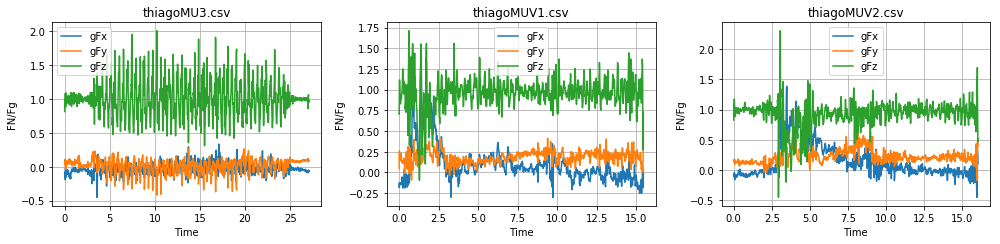

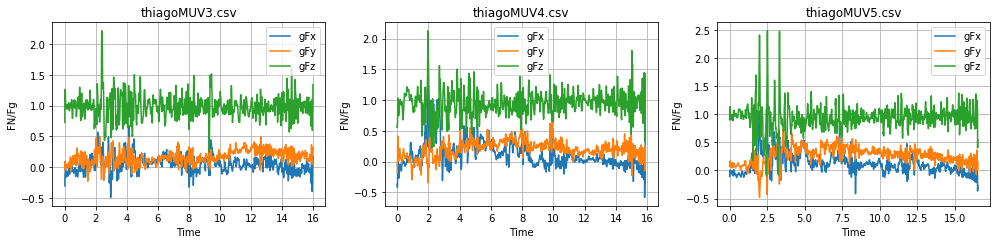

In [9]:
calcula(0)


Pelos gráficos, podemos notar consistentemente que os movimentos no skate foram mais estaveis, ja que o movimento se baseia no rolamento das rodas em detrimento de dar passos no chão (o que causa mais perturbações no movimento, o que pode ser observado pela componente gFz). Com os dados do acelerômetro, plotamos - utilizando o algoritmo de Euler Cromer - Gráficos de Velocidade x Tempo

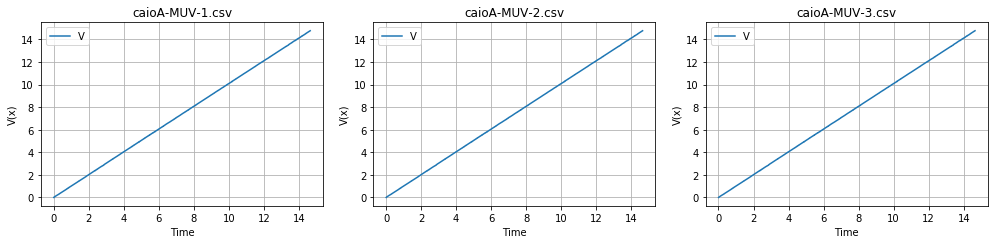

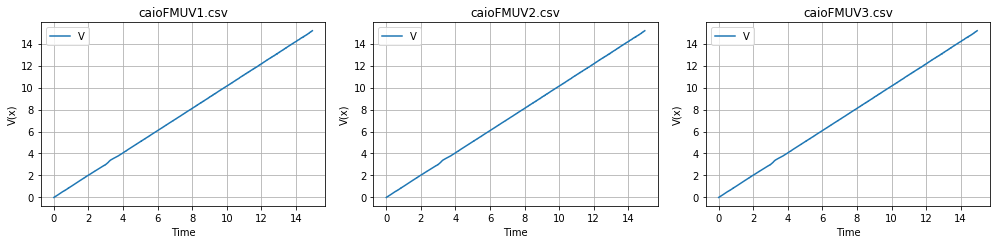

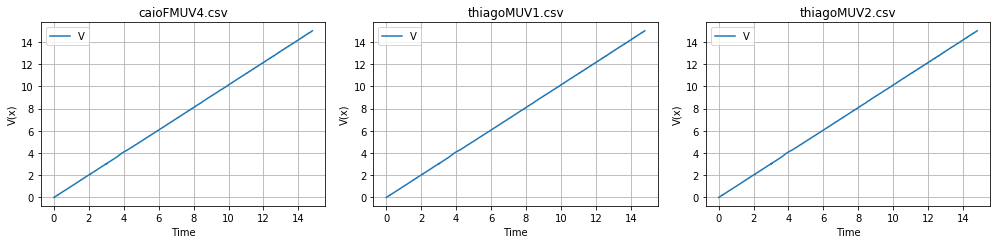

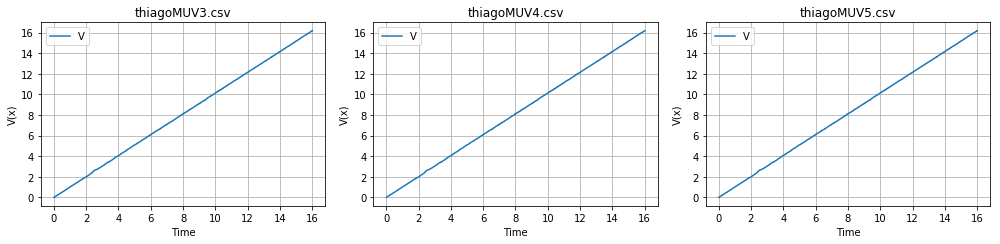

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob
import math
import numpy as np

names = []
for file in glob.glob("*MUV*.csv"):   #armazena o titulo de cada arquivo em uma lista
    if file != "dadosMU.csv" and file != "dadosMUV.csv":
        names.append(file)
#print(names)
names.sort()  #ordena para facilitar a interpretacao

def calcula(j):
    tbl = pd.read_csv(names[j])  #le os arquivos.csv
    tbl.head()
    a_comp = [tbl['gFx'],tbl['gFy'],tbl['gFz']]
    t = tbl['time']
    a_mod = []
    for i in range(len(a_comp[0])):
        mod = math.sqrt(a_comp[0][i]**2 + a_comp[1][i]**2 + a_comp[2][i]**2)
        a_mod.append(mod)
    
    v = [0]
    v.append(a_mod[0]*(t[0]))
    for i in range(1,len(a_mod)-1):
        v.append(v[i] + a_mod[i]*(t[i]-t[i-1]))
    
    fig = plt.figure(figsize=(14, 3.5))  #formata os graficos
    plt.subplot(131)  #posicao de cada grafico na linha (isso que nao consegui fazer funcionar nesse codigo)
    plt.xlabel('Time')
    plt.ylabel("V(x)")
    plt.plot(t,v,label="V")  #cria cada linha
    #sns.regplot(tbl['time'],tbl['gFz'])
    plt.title(names[j])
    plt.grid(True)
    plt.legend()
    if j+1 in range(len(names)): j+=1
    else:
        plt.tight_layout()
        plt.show()
        return()
    
    
    plt.subplot(132)  #posicao de cada grafico na linha (isso que nao consegui fazer funcionar nesse codigo)
    plt.xlabel('Time')
    plt.ylabel("V(x)")
    plt.plot(t,v,label="V")  #cria cada linha
    #sns.regplot(tbl['time'],tbl['gFz'])
    plt.title(names[j])
    plt.grid(True)
    plt.legend()
    if j+1 in range(len(names)): j+=1
    else:
        plt.tight_layout()
        plt.show()
        return()
    
    
    plt.subplot(133)  #posicao de cada grafico na linha (isso que nao consegui fazer funcionar nesse codigo)
    plt.xlabel('Time')
    plt.ylabel("V(x)")
    plt.plot(t,v,label="V")  #cria cada linha
    #sns.regplot(tbl['time'],tbl['gFz'])
    plt.title(names[j])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()     #printa o grafico
    if j+1 in range(len(names)):
        j+=1
        calcula(j)
calcula(0)    

Obtemos o resultado experado experimentalmente : Os pontos do gráfico v(t) são interpolados por uma reta. Isso mostra que a aceleração ao longo do percurso foi aproximadamente constante. Podemos notar algumas perturbações nos primeiros momentos do movimento, o que pode ser explicado pela pessoa se ajeitando no skate, buscando uma posição mais estável.

### Dados anotados a mão

Com os dados anotados a mão, conseguimos plotar os seguintes gráficos

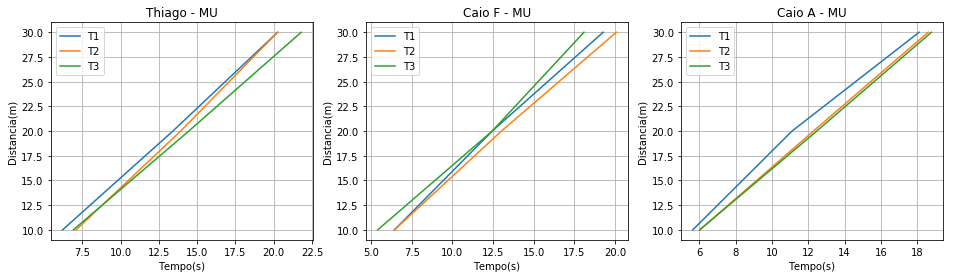

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob

#MU

tbl = pd.read_csv("dadosMU.csv")
tbl.head()
fig = plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(tbl["T1"], tbl["Dist"], label = "T1")
plt.plot(tbl["T2"], tbl["Dist"], label = "T2")
plt.plot(tbl["T3"], tbl["Dist"], label = "T3")
plt.ylabel("Distancia(m)")
plt.xlabel("Tempo(s)")
plt.title("Thiago - MU")
plt.legend()
plt.grid(True)

plt.subplot(132)
plt.plot(tbl["CF1"], tbl["Dist"], label = "T1")
plt.plot(tbl["CF2"], tbl["Dist"], label = "T2")
plt.plot(tbl["CF3"], tbl["Dist"], label = "T3")
plt.ylabel("Distancia(m)")
plt.xlabel("Tempo(s)")
plt.title("Caio F - MU")
plt.legend()
plt.grid(True)

plt.subplot(133)
plt.plot(tbl["CA1"], tbl["Dist"], label = "T1")
plt.plot(tbl["CA2"], tbl["Dist"], label = "T2")
plt.plot(tbl["CA3"], tbl["Dist"], label = "T3")
plt.ylabel("Distancia(m)")
plt.xlabel("Tempo(s)")
plt.title("Caio A - MU")
plt.grid(True)
plt.legend()
plt.show()

#--------------------------------------------------------#

Pelos dados acima podemos notar um problema em nossa metodologia de coleta de dados : o movimento nem sempre apresentou velocidade constante. Como evidenciado no movimento "T1" do gráfico "Caio A - MU", houve mudança na velocidade. As velocidades médias calculadas foram : 


Thiago MU 
T1

    0m - 10m : 1.61m/s
    10m - 20m : 1.38m/s
    20m - 30m : 1.35 m/s
    
T2
    
    0m - 10m : 1.41m/s
    10m - 20m : 1.46m/s
    20m - 30m : 1.57m/s
    
T3
    
    0m - 10m : 1.44 m/s
    10m - 20m : 1.32 m/s
    20m - 30m : 1.36 m/s
    
Caio F MU 

T1

    0m - 10m : 1.55 m/s
    10m - 20m : 1.66 m/s
    20m - 30m : 1.46 m/s
   
T2

    0m - 10m : 1.55 m/s
    10m - 20m : 1.51 m/s
    20m - 30m : 1.41 m/s
   
T3

    0m - 10m : 1.85 m/s
    10m - 20m : 1.41 m/s
    20m - 30m : 1.76 m/s
   

Caio A MU

T1

    0m - 10m : 1.77 m/s
    10m - 20m : 1.82 m/s
    20m - 30m : 1.48 m/s
   
   
T2 


    0m - 10m : 1.66 m/s
    10m - 20m : 1.59 m/s
    20m - 30m : 1.58 m/s
   
T3

    0m - 10m : 1.66 m/s
    10m - 20m : 1.55 m/s
    20m - 30m : 1.58 m/s

Nota-se que muitos movimentos apresentaram velocidades inconstantes. Mesmo todas velocidades dentro da mesma travessia serem similares entre si, elas flutuam excessivamente entre si. Ademais, é interessante de se notar que a diferença de velocidade entre os checkpoints é relativamente constante, o que é esperado para esse tipo de movimento.

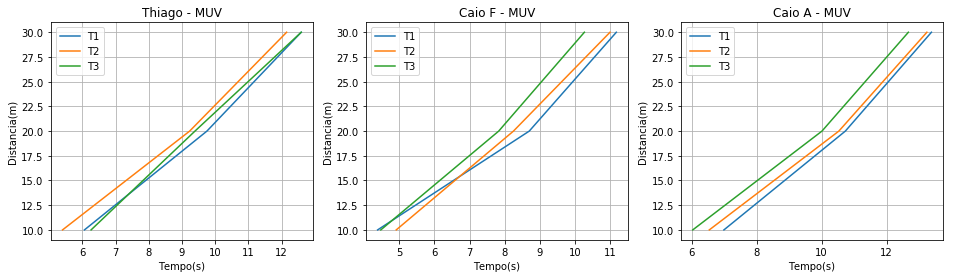

In [12]:
#--------------------------------------------------------#

#MUV
tbl=pd.read_csv("dadosMUV.csv")
tbl.head()
fig = plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(tbl["T1"], tbl["Dist"], label = "T1")
plt.plot(tbl["T2"], tbl["Dist"], label = "T2")
plt.plot(tbl["T3"], tbl["Dist"], label = "T3")
plt.ylabel("Distancia(m)")
plt.xlabel("Tempo(s)")
plt.title("Thiago - MUV")
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.plot(tbl["CF1"], tbl["Dist"], label = "T1")
plt.plot(tbl["CF2"], tbl["Dist"], label = "T2")
plt.plot(tbl["CF3"], tbl["Dist"], label = "T3")
plt.ylabel("Distancia(m)")
plt.xlabel("Tempo(s)")
plt.title("Caio F - MUV")
plt.grid(True)
plt.legend()

plt.subplot(133)
plt.plot(tbl["CA1"], tbl["Dist"], label = "T1")
plt.plot(tbl["CA2"], tbl["Dist"], label = "T2")
plt.plot(tbl["CA3"], tbl["Dist"], label = "T3")
plt.ylabel("Distancia(m)")
plt.xlabel("Tempo(s)")
plt.title("Caio A - MUV")
plt.grid(True)
plt.legend()
plt.show()

Como apresentamos poucos pontos com cronômetros, os dados apresentam aspecto de várias retas sobrepostas - sendo que o comportamente analítico esperado de um corpo acelerando aceleradamente seria de um polinômio de segundo grau. No entanto, é notável que em todos os movimentos, a velocidade ( que nada mais é do que a inclinação da função do deslocamento ) aumenta ao longo do tempo. Os valores calculados para a velocidade média foram : 


CaioF MUV 
T1

    0m - 10m : 2.28 m/s
    10m - 20m : 2.31m/s
    20m - 30m : 4.03 m/s
    
T2
    
    0m - 10m : 2.03 m/s
    10m - 20m : 2.99 m/s
    20m - 30m : 3.63 m/s
    
T3
    
    0m - 10m : 2.23 m/s
    10m - 20m : 2.97 m/s
    20m - 30m : 4.09 m/s
    
Thiago MUV 

T1

    0m - 10m : 1.65 m/s
    10m - 20m : 2.71 m/s
    20m - 30m : 3.52 m/s
   
T2

    0m - 10m : 1.85 m/s
    10m - 20m : 2.61 m/s
    20m - 30m : 3.42 m/s
   
T3

    0m - 10m : 1.59 m/s
    10m - 20m : 3.19 m/s
    20m - 30m : 3.12 m/s
   

Caio A MUV

T1

    0m - 10m : 1.43 m/s
    10m - 20m : 2.67 m/s
    20m - 30m : 3.77 m/s
   
   
T2 


    0m - 10m : 1.52 m/s
    10m - 20m : 2.50 m/s
    20m - 30m : 3.69 m/s
   
T3

    0m - 10m : 1.65 m/s
    10m - 20m : 2.51 m/s
    20m - 30m : 3.75 m/s
    
    
    
Nota-se pelos dados a aceleração do movimento. No MU, a diferença de velocidade media entre cada intervalo de checkpoints é relativamente baixa ( o esperado para um movimento uniforme ), mas aqui, a diferença é sempre maior entre o intervalo 20m-30 e 10m - 20m do que a diferença entre 0m - 10m e 10m - 20m.

## Crítica

   Ao fim desse experimento, aprendemos parte do que é ser um cientista de dados. Aprendemos sobre os problemas numa colheta de dados, como se preocupar com o seu ambiente de forma que não afete os seus dados de maneira indesejada e, acima disso, como modelar o experimento para que a coleta de dados seja satisfatória.
   
   No entanto, tivemos problemas para modelar o experimento de forma satisfatória : o fato do experimento ter ocorrido numa ladeira de leve inclinação e usarmos apenas 3 checkpoints contribuíram para não termos dados o bastante para que o gráfico plotado se assemelhasse com uma parábola; Como não usamos um metronômo como forma de padronizar o movimento uniforme, ele não foi de fato uniforme e nossos movimentos apresentaram oscilação na velocidade. Ademais, o modelo matemático presume um sistema isolado, no qual não há atrito e os corpos se movimentam de forma regular. Como a pista na qual fizemos o experimento apresentava irregularidades, e não conseguimos padronizar totalmente o movimento (a forma como cada integrante sobe no skate, por exemplo) o modelo não se adequa ao experimento.

   Compreendemos como utilizar ferramentas relativas a e-science como Jupyer, Pandas e matplotlib (ambas bibliotecas de Python voltadas a ciência de dados) e a interpretar resultados de um acelrômetro.
    
   O experimento foi muito interessante para uma introdução ao método cientifico de forma prática

## Log

 * Coleta de dados (MRU) : 3 horas
 * Coleta de dados (MUV) : 2 horas e 30 minutos
 * Análise de dados : 17 horas
 * Edição de vídeo : 15 horas

## Contribuição dos autores

Leandro Rodrigues editou o vídeo referente ao experimento, Thiago Teixeira e Caio fontes geraram os gráficos de MUV e MU (acelerômetro e dados manuais), Caio Fontes e Caio Andrade redigiram o relatório e executaram a análise dos dados.Caio Fontes, Caio Andrade e Thiago Teixeira foram o alvo do experimento do MU e MUV. Todos os autores se revezaram para gravar o vídeo do experimento. Todos os autores leram e aprovaram este relatório. Todos os autores se revezaram para anotar os dados dos cronometros manualmente.

## Link do vídeo

https://youtu.be/_E6_dLCoTiY